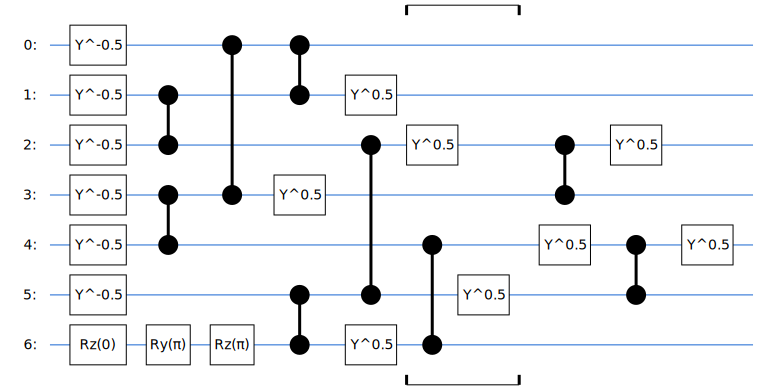

In [ ]:
import warnings

import cirq
import numpy as np
import matplotlib.pyplot as plt
import bloqade.cirq_utils as utils
from cirq.contrib.svg import SVGCircuit

from bloqade import squin, cirq_utils

warnings.filterwarnings("ignore")

def build_state_injection(theta: float, phi: float) -> cirq.Circuit:
    """
    Build state injection that attaches 3 stabalizers to 1 input state
    Inputs:
    theta in [0,pi), phi in [0, 2pi)
    Returns:
    Circuit
    """

    @squin.kernel
    def state_injection_kernal():
        q = squin.qalloc(7)
        squin.u3(theta, phi, 0, q[6])

        # apply sqrt_y_adj to first 5 gates
        for i in range(6):
            squin.sqrt_y_adj(q[i])

        # apply cz to pairs
        squin.cz(q[1], q[2])
        squin.cz(q[3], q[4])
        squin.cz(q[5], q[6])

        # apply sqrt_y gate to injection state
        squin.sqrt_y(q[6])

        # apply cz to more pairs
        squin.cz(q[0], q[3])
        squin.cz(q[2], q[5])
        squin.cz(q[4], q[6])

        # apply sqrt_y gates
        for i in range(2, 7):
            squin.sqrt_y(q[i])

        # apply MORE cz gates
        squin.cz(q[0], q[1])
        squin.cz(q[2], q[3])
        squin.cz(q[4], q[5])

        squin.sqrt_y(q[1])
        squin.sqrt_y(q[2])
        squin.sqrt_y(q[4])

    # Create LineQubits for compatibility with existing code
    qubits = cirq.LineQubit.range(7)
    circuit = cirq_utils.emit_circuit(state_injection_kernal, circuit_qubits=qubits)

    return circuit

state_injection_circuit = build_state_injection(np.pi,np.pi)
SVGCircuit(state_injection_circuit)